## I found the Monty Hall problem to be unintuitive, and the mathematical proofs were not satisfying to me (though I did believe them). So I decided to prove it for myself using Monte-Carlo techniques.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#we will make one full function which takes n doors to prove this problem for a general
#number of doors. We will also take the number of simulations. Note that it takes
#more simulations to find the result when you have more doors.
#for a most accurate result, select an even number of simulations
def montyhall(ndoors,nsimulations):
    #generates doors
    successes_not_switching = 0
    successes_switching = 0
    for n in range(nsimulations):
        doors = np.arange(ndoors)
        #selects doors
        correct_door = np.random.choice(doors)
        door_choice = np.random.choice(doors)
        #deletes choice door before selecting which door to remove
        doors_to_remove_from = np.delete(doors,[door_choice,correct_door])
        #selects a random door to remove
        removed_door = np.random.choice(doors_to_remove_from)
        removed_door_index = np.where(doors==removed_door)
        #removes that door
        doors = np.delete(doors,removed_door_index)
        
        #half of the time we decide to swap doors
        if n%2 == 0:
            #makes new doors to select from
            current_choice_index = np.where(doors==door_choice)
            new_doors = np.delete(doors,current_choice_index)
            
            #selects the new door
            new_door = np.random.choice(new_doors)
            #checks correctness
            if new_door == correct_door:
                successes_switching+=1
        #case where the player does not change their choice
        else:
            if door_choice == correct_door:
                successes_not_switching+=1
                
    switching_success_rate = successes_switching/nsimulations*2
    not_switching_success_rate = successes_not_switching/nsimulations*2
    return not_switching_success_rate,switching_success_rate

In [10]:
not_switching, switching = montyhall(3,10000)

In [11]:
print('The success rate of not switching doors is ',not_switching,'and the success rate for switching doors is',switching)

The success rate of not switching doors is  0.339 and the success rate for switching doors is 0.6714


Text(0, 0.5, 'Success Rate')

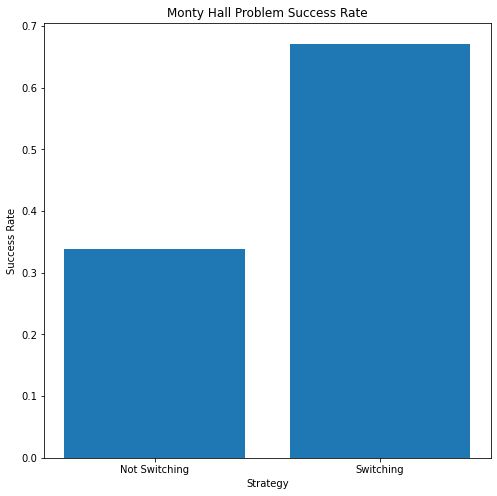

In [12]:
plt.figure(figsize = (8,8))
plt.bar(['Not Switching','Switching'],[not_switching,switching])
plt.title('Monty Hall Problem Success Rate')
plt.xlabel('Strategy')
plt.ylabel('Success Rate')

And there it is! We get the expected result which appraoches a 1/3 success rate for not switching and a 2/3 success rate for switching, proving that switching does indeed increase the probability of selecting the correct door. A simulation of the Monty Hall problem for a general number of doors. This demonstration uses three doors, but feel free to try more! Keep in mind that more simulations will be needed when the number of doors increase.